# **CASE STUDY 1 - ONLINE RETAILS DATA ANALYSIS**

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('OnlineRetail.xlsx') # 1st step

df.dtypes # 2nd step

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [69]:
df.describe() # 2nd step

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [70]:
df.fillna(0, inplace=True) # 3rd step (Data cleaning/Cleansing)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [71]:
# 4th step - Get rid of 'InvonceNo' column
selected_columns = ['StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
df_selected = df[selected_columns]

df_selected.head() # 5th step

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#1) Measures of Frequency

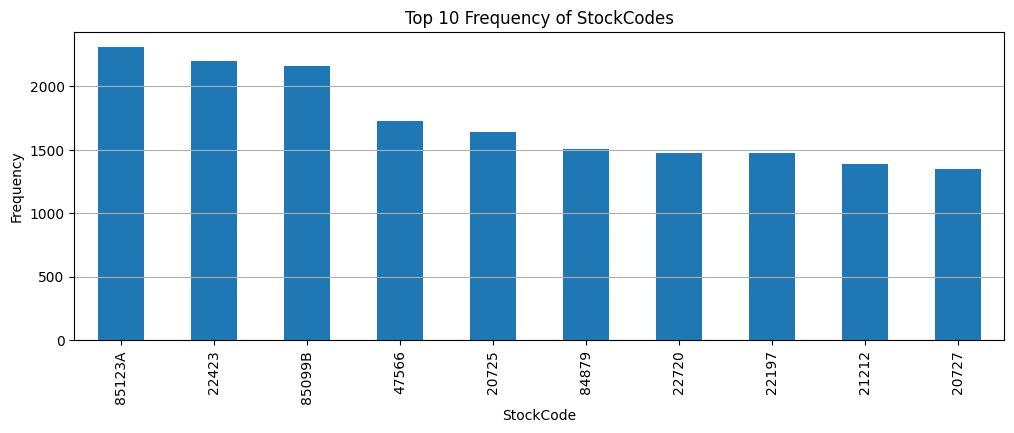

In [47]:
# By visualizing this frequency, we can understand which products or countries are more prevalent in the dataset.
# Calculate the frequency of each StockCode
stockcode_frequency = df['StockCode'].value_counts()

# Top 10 most frequent StockCodes
top_10_stockcodes = stockcode_frequency.head(10)

plt.figure(figsize=(12, 4))
top_10_stockcodes.plot(kind='bar')
plt.title('Top 10 Frequency of StockCodes')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


#1) Measures of Frequency

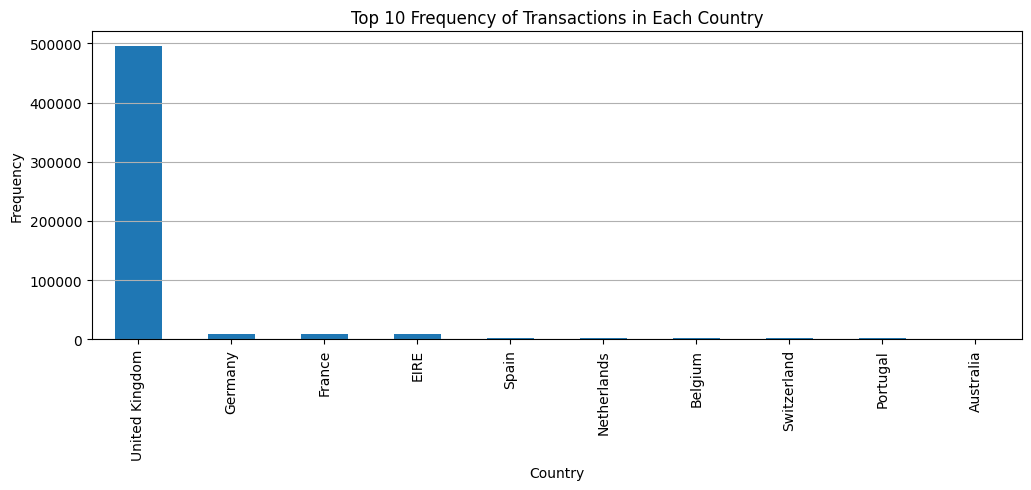

In [46]:
# By visualizing this frequency, we can understand which products or countries are more prevalent in the dataset.
# Plot frequency of transactions in each Country
country_frequency = df['Country'].value_counts()

top_10_countries = country_frequency.head(10)

plt.figure(figsize=(12, 4))
top_10_countries.plot(kind='bar')
plt.title('Top 10 Frequency of Transactions in Each Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

##1) Measures of Frequency

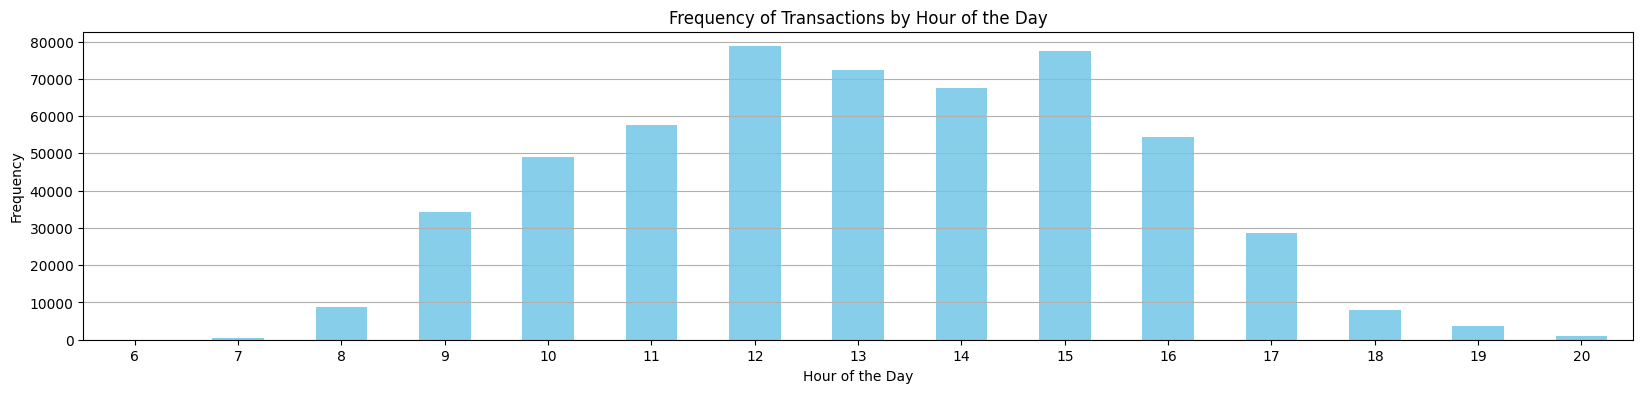

In [75]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the frequency of transactions for each hour of the day
hourly_frequency = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(20, 4))
hourly_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency of Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#2) Measures of Central Tendency

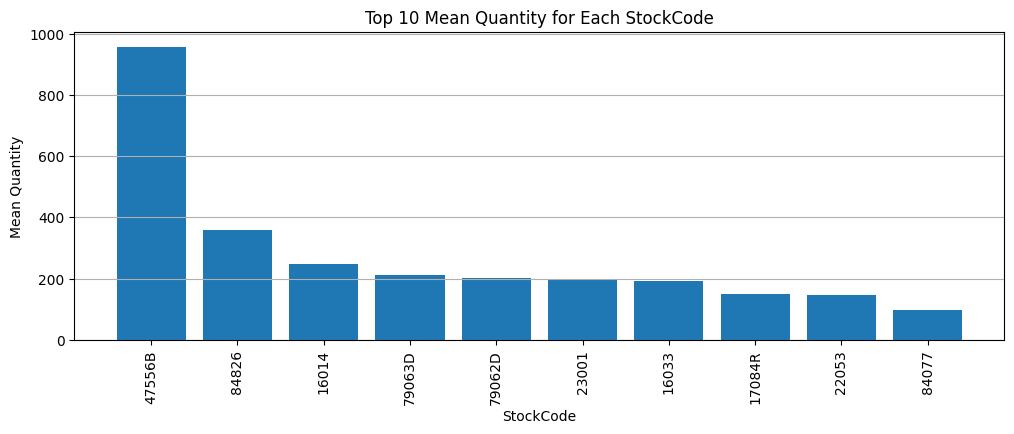

In [59]:
# Calculate the mean value for each StockCode
mean_values = df.groupby('StockCode')['Quantity'].mean().reset_index()

mean_values_sorted = mean_values.sort_values(by='Quantity', ascending=False)

top_10_mean_values = mean_values_sorted.head(10)

# StockCode versus their means
plt.figure(figsize=(12, 4))
plt.bar(top_10_mean_values['StockCode'].astype(str), top_10_mean_values['Quantity'])
plt.title('Top 10 Mean Quantity for Each StockCode')
plt.xlabel('StockCode')
plt.ylabel('Mean Quantity')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

#3) Measures of Dispersion – Range / Variance

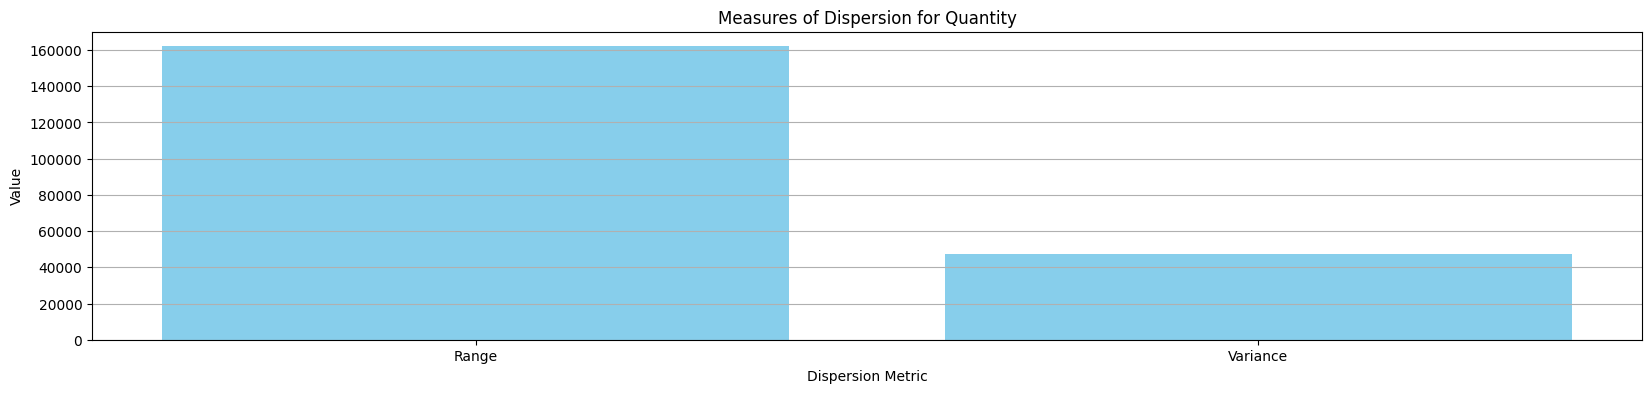

In [50]:
# Calculate range, variance for Quantity
quantity_range = df['Quantity'].max() - df['Quantity'].min()
quantity_variance = df['Quantity'].var()
dispersion_metrics = pd.DataFrame({
    'Metric': ['Range', 'Variance'],
    'Value': [quantity_range, quantity_variance]
})

plt.figure(figsize=(20, 4))
plt.bar(dispersion_metrics['Metric'], dispersion_metrics['Value'], color='skyblue')
plt.title('Measures of Dispersion for Quantity')
plt.xlabel('Dispersion Metric')
plt.ylabel('Value')
plt.grid(axis='y')
plt.show()

#4) Measures of Dispersion – Quartiles and Box Plots

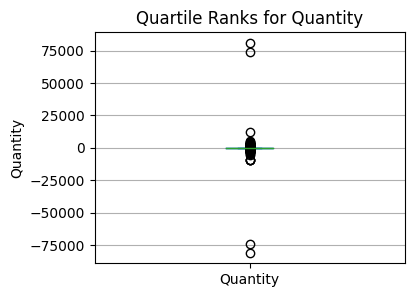

First Quartile (Q1): 1.0
Median (Q2): 3.0
Third Quartile (Q3): 10.0


In [76]:
# Calculate quartile ranks for Quantity
quartiles = df['Quantity'].quantile([0.25, 0.5, 0.75])
q1, median, q3 = quartiles

plt.figure(figsize=(4, 3))
df['Quantity'].plot(kind='box')
plt.title('Quartile Ranks for Quantity')
plt.ylabel('Quantity')
plt.grid(axis='y')
plt.show()

print("First Quartile (Q1):", q1)
print("Median (Q2):", median)
print("Third Quartile (Q3):", q3)